In [25]:
import pandas as pd 
import re
import string
pd.set_option('display.max_colwidth', None)
import nltk.corpus
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import matplotlib.pyplot as plt 
#!pip install seaborn
import seaborn as sns
# !pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
import textblob

In [2]:
reviews = pd.read_json('DatasetFinal.json')

In [3]:
reviews.shape

(78634, 6)

In [4]:
reviews.head()

asin  overall   reviewTime      title  \
0  0700026657        5  10 17, 2015  Anno 2070   
1  0700026657        4  07 27, 2015  Anno 2070   
2  0700026657        3  02 23, 2015  Anno 2070   
3  0700026657        2  02 20, 2015  Anno 2070   
4  0700026657        5  12 25, 2014  Anno 2070   

                                                                                    imageURL  \
0  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
1  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
2  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
3  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
4  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   

                                                                                                                                                                                                                                                                                                                                                reviews  
0                                                                                                                                                                                                                                                    This game is a bit hard to get the hang of, but when you do it's great.but when you do it's great.  
1  I played it a while but it was alright. The steam was a bit of trouble. The more they move these game to steam the more of a hard time I have activating and playing a game. But in spite of that it was fun, I liked it. Now I am looking forward to anno 2205 I really want to play my way to the moon.But in spite of that it was fun, I liked it  
2                                                                                                                                                                                                                                                                                                                                   ok game.Three Stars  
3                                                                                                                                                                                                                                           found the game a bit too complicated, not what I expected after having played 1602, 1503, and 1701Two Stars  
4                                                                                                                                                                                                                                                                              great game, I love it and have played it since its arrivedlove this game

In [5]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [6]:
reviews['sentiment'] = reviews.apply(f, axis=1)
reviews.head()

asin  overall   reviewTime      title  \
0  0700026657        5  10 17, 2015  Anno 2070   
1  0700026657        4  07 27, 2015  Anno 2070   
2  0700026657        3  02 23, 2015  Anno 2070   
3  0700026657        2  02 20, 2015  Anno 2070   
4  0700026657        5  12 25, 2014  Anno 2070   

                                                                                    imageURL  \
0  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
1  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
2  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
3  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
4  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   

                                                                                                                                                                                                                                                                                                                                                reviews  \
0                                                                                                                                                                                                                                                    This game is a bit hard to get the hang of, but when you do it's great.but when you do it's great.   
1  I played it a while but it was alright. The steam was a bit of trouble. The more they move these game to steam the more of a hard time I have activating and playing a game. But in spite of that it was fun, I liked it. Now I am looking forward to anno 2205 I really want to play my way to the moon.But in spite of that it was fun, I liked it   
2                                                                                                                                                                                                                                                                                                                                   ok game.Three Stars   
3                                                                                                                                                                                                                                           found the game a bit too complicated, not what I expected after having played 1602, 1503, and 1701Two Stars   
4                                                                                                                                                                                                                                                                              great game, I love it and have played it since its arrivedlove this game   

  sentiment  
0  Positive  
1  Positive  
2   Neutral  
3  Negative  
4  Positive

In [7]:
reviews['sentiment'].value_counts()

Positive    54951
Negative    13739
Neutral      9944
Name: sentiment, dtype: int64

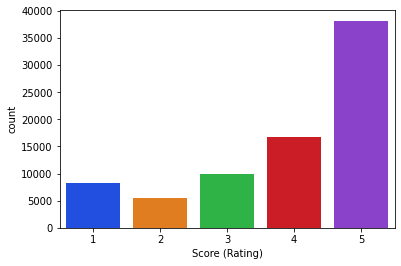

In [8]:
plt.figure()
sns.countplot(x='overall', data=reviews, palette='bright')
plt.xlabel('Score (Rating)')
plt.show()

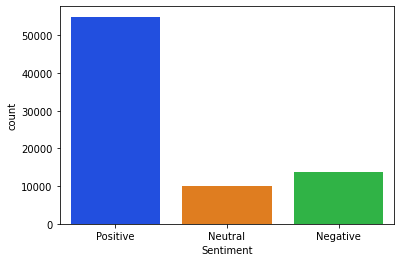

In [9]:
plt.figure()
sns.countplot(x='sentiment', data=reviews, palette='bright')
plt.xlabel('Sentiment')
plt.show()

In [10]:
# new data frame which has date and year
new = reviews["reviewTime"].str.split(",", n = 1, expand = True) 
  
# making separate date column from new data frame 
reviews["date"]= new[0] 
  
# making separate year column from new data frame 
reviews["year"]= new[1] 

reviews=reviews.drop(['reviewTime'], axis=1)
reviews.head()

asin  overall      title  \
0  0700026657        5  Anno 2070   
1  0700026657        4  Anno 2070   
2  0700026657        3  Anno 2070   
3  0700026657        2  Anno 2070   
4  0700026657        5  Anno 2070   

                                                                                    imageURL  \
0  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
1  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
2  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
3  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
4  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   

                                                                                                                                                                                                                                                                                                                                                reviews  \
0                                                                                                                                                                                                                                                    This game is a bit hard to get the hang of, but when you do it's great.but when you do it's great.   
1  I played it a while but it was alright. The steam was a bit of trouble. The more they move these game to steam the more of a hard time I have activating and playing a game. But in spite of that it was fun, I liked it. Now I am looking forward to anno 2205 I really want to play my way to the moon.But in spite of that it was fun, I liked it   
2                                                                                                                                                                                                                                                                                                                                   ok game.Three Stars   
3                                                                                                                                                                                                                                           found the game a bit too complicated, not what I expected after having played 1602, 1503, and 1701Two Stars   
4                                                                                                                                                                                                                                                                              great game, I love it and have played it since its arrivedlove this game   

  sentiment   date   year  
0  Positive  10 17   2015  
1  Positive  07 27   2015  
2   Neutral  02 23   2015  
3  Negative  02 20   2015  
4  Positive  12 25   2014

In [11]:
new1 = reviews["date"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
reviews["month"]= new1[0] 
  
# adding day to the main dataset 
reviews["day"]= new1[1] 

reviews=reviews.drop(['date'], axis=1)
reviews.head()

asin  overall      title  \
0  0700026657        5  Anno 2070   
1  0700026657        4  Anno 2070   
2  0700026657        3  Anno 2070   
3  0700026657        2  Anno 2070   
4  0700026657        5  Anno 2070   

                                                                                    imageURL  \
0  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
1  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
2  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
3  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
4  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   

                                                                                                                                                                                                                                                                                                                                                reviews  \
0                                                                                                                                                                                                                                                    This game is a bit hard to get the hang of, but when you do it's great.but when you do it's great.   
1  I played it a while but it was alright. The steam was a bit of trouble. The more they move these game to steam the more of a hard time I have activating and playing a game. But in spite of that it was fun, I liked it. Now I am looking forward to anno 2205 I really want to play my way to the moon.But in spite of that it was fun, I liked it   
2                                                                                                                                                                                                                                                                                                                                   ok game.Three Stars   
3                                                                                                                                                                                                                                           found the game a bit too complicated, not what I expected after having played 1602, 1503, and 1701Two Stars   
4                                                                                                                                                                                                                                                                              great game, I love it and have played it since its arrivedlove this game   

  sentiment   year month day  
0  Positive   2015    10  17  
1  Positive   2015    07  27  
2   Neutral   2015    02  23  
3  Negative   2015    02  20  
4  Positive   2014    12  25

In [12]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [13]:
reviews['reviews']=reviews['reviews'].apply(lambda x:review_cleaning(x))
reviews.head()

asin  overall      title  \
0  0700026657        5  Anno 2070   
1  0700026657        4  Anno 2070   
2  0700026657        3  Anno 2070   
3  0700026657        2  Anno 2070   
4  0700026657        5  Anno 2070   

                                                                                    imageURL  \
0  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
1  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
2  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
3  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
4  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   

                                                                                                                                                                                                                                                                                                                                     reviews  \
0                                                                                                                                                                                                                                              this game is a bit hard to get the hang of but when you do its greatbut when you do its great   
1  i played it a while but it was alright the steam was a bit of trouble the more they move these game to steam the more of a hard time i have activating and playing a game but in spite of that it was fun i liked it now i am looking forward to anno  i really want to play my way to the moonbut in spite of that it was fun i liked it   
2                                                                                                                                                                                                                                                                                                                         ok gamethree stars   
3                                                                                                                                                                                                                                                  found the game a bit too complicated not what i expected after having played   and  stars   
4                                                                                                                                                                                                                                                                    great game i love it and have played it since its arrivedlove this game   

  sentiment   year month day  
0  Positive   2015    10  17  
1  Positive   2015    07  27  
2   Neutral   2015    02  23  
3  Negative   2015    02  20  
4  Positive   2014    12  25

In [14]:
reviews['reviews'] = reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [15]:
reviews.head()

asin  overall      title  \
0  0700026657        5  Anno 2070   
1  0700026657        4  Anno 2070   
2  0700026657        3  Anno 2070   
3  0700026657        2  Anno 2070   
4  0700026657        5  Anno 2070   

                                                                                    imageURL  \
0  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
1  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
2  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
3  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
4  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   

                                                                                                                                                                reviews  \
0                                                                                                                                 game bit hard get hang greatbut great   
1  played alright steam bit trouble move game steam hard time activating playing game spite fun liked looking forward anno really want play way moonbut spite fun liked   
2                                                                                                                                                    ok gamethree stars   
3                                                                                                                      found game bit complicated expected played stars   
4                                                                                                                         great game love played since arrivedlove game   

  sentiment   year month day  
0  Positive   2015    10  17  
1  Positive   2015    07  27  
2   Neutral   2015    02  23  
3  Negative   2015    02  20  
4  Positive   2014    12  25

In [16]:
my_max = reviews['year'].astype(str).astype(int).loc[reviews['year'].astype(str).astype(int).idxmax()]
print(my_max)

2018


In [17]:
my_min = reviews['year'].astype(str).astype(int).loc[reviews['year'].astype(str).astype(int).idxmin()]
print(my_min)

1999


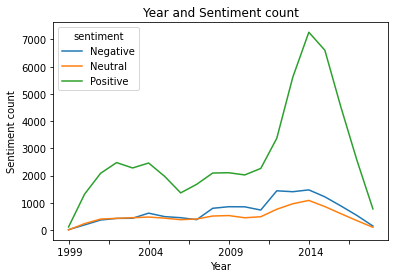

In [18]:
reviews.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

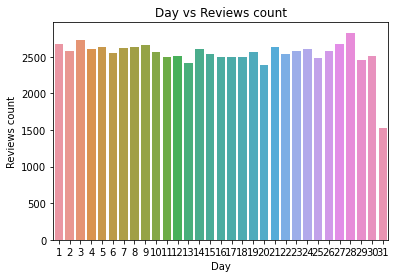

In [19]:
#Creating a dataframe
day=pd.DataFrame(reviews.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

In [20]:
review_pos = reviews[reviews["sentiment"]=='Positive']
review_neu = reviews[reviews["sentiment"]=='Neutral']
review_neg = reviews[reviews["sentiment"]=='Negative']

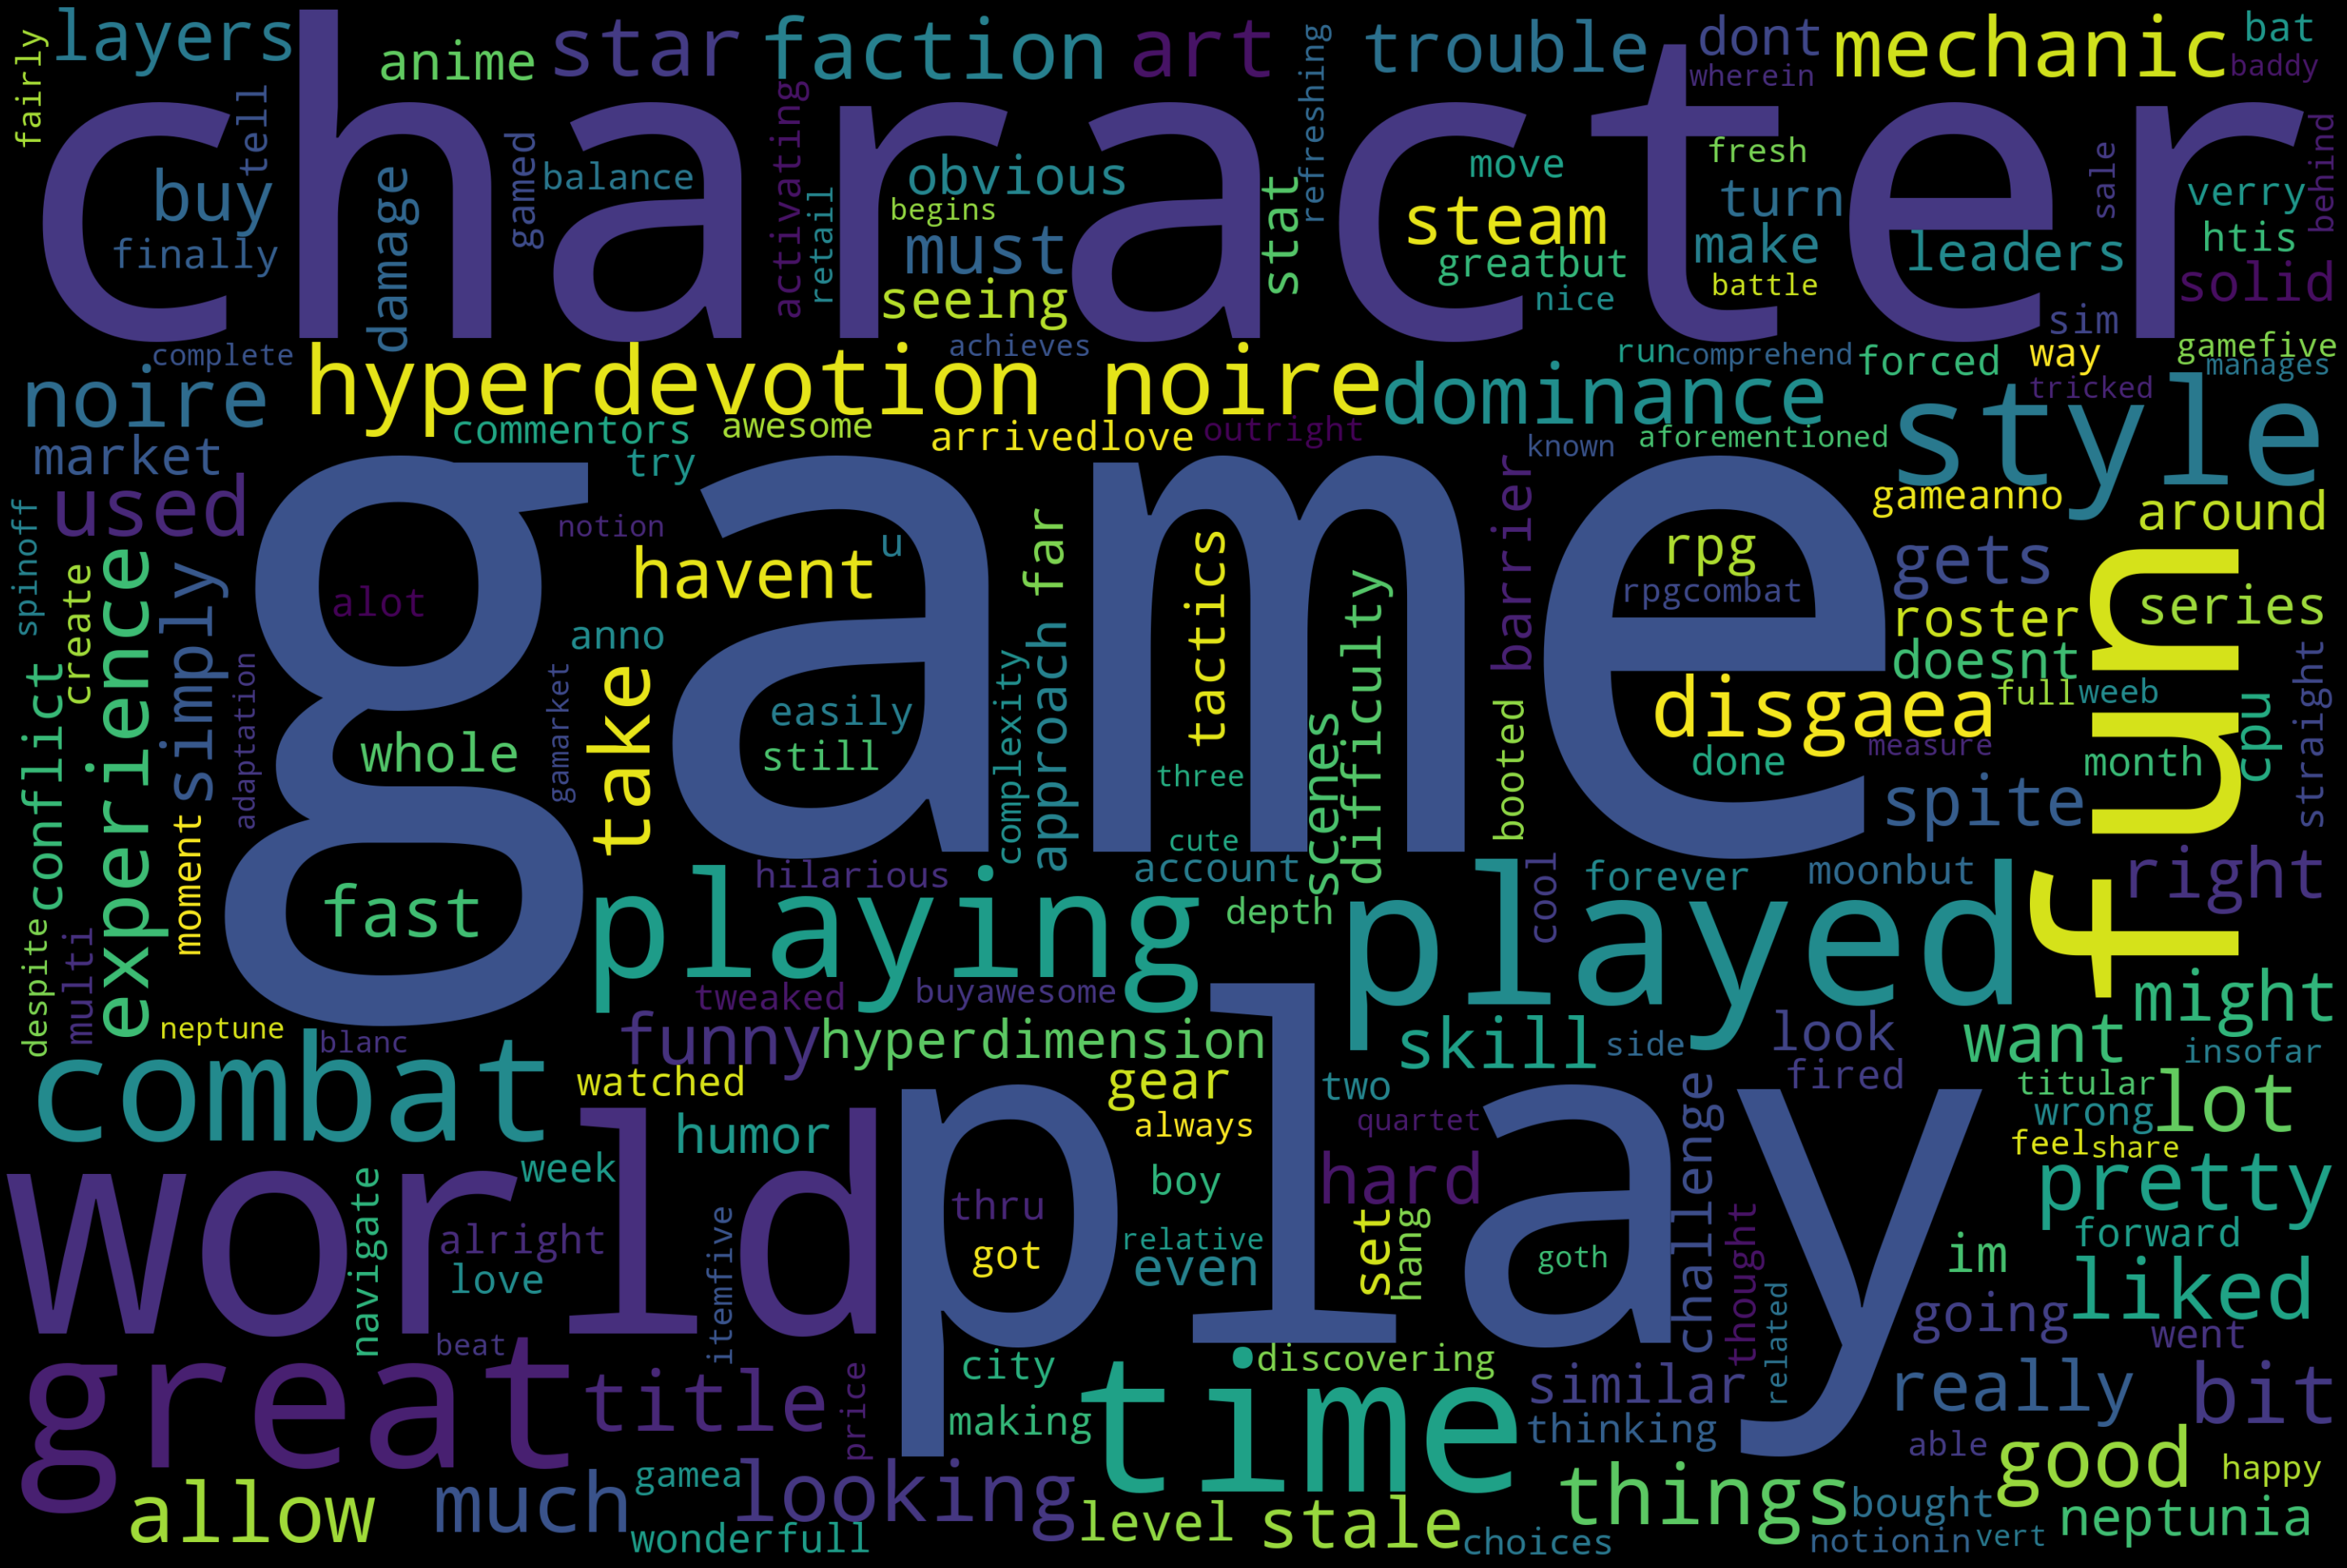

In [21]:
text = review_pos["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

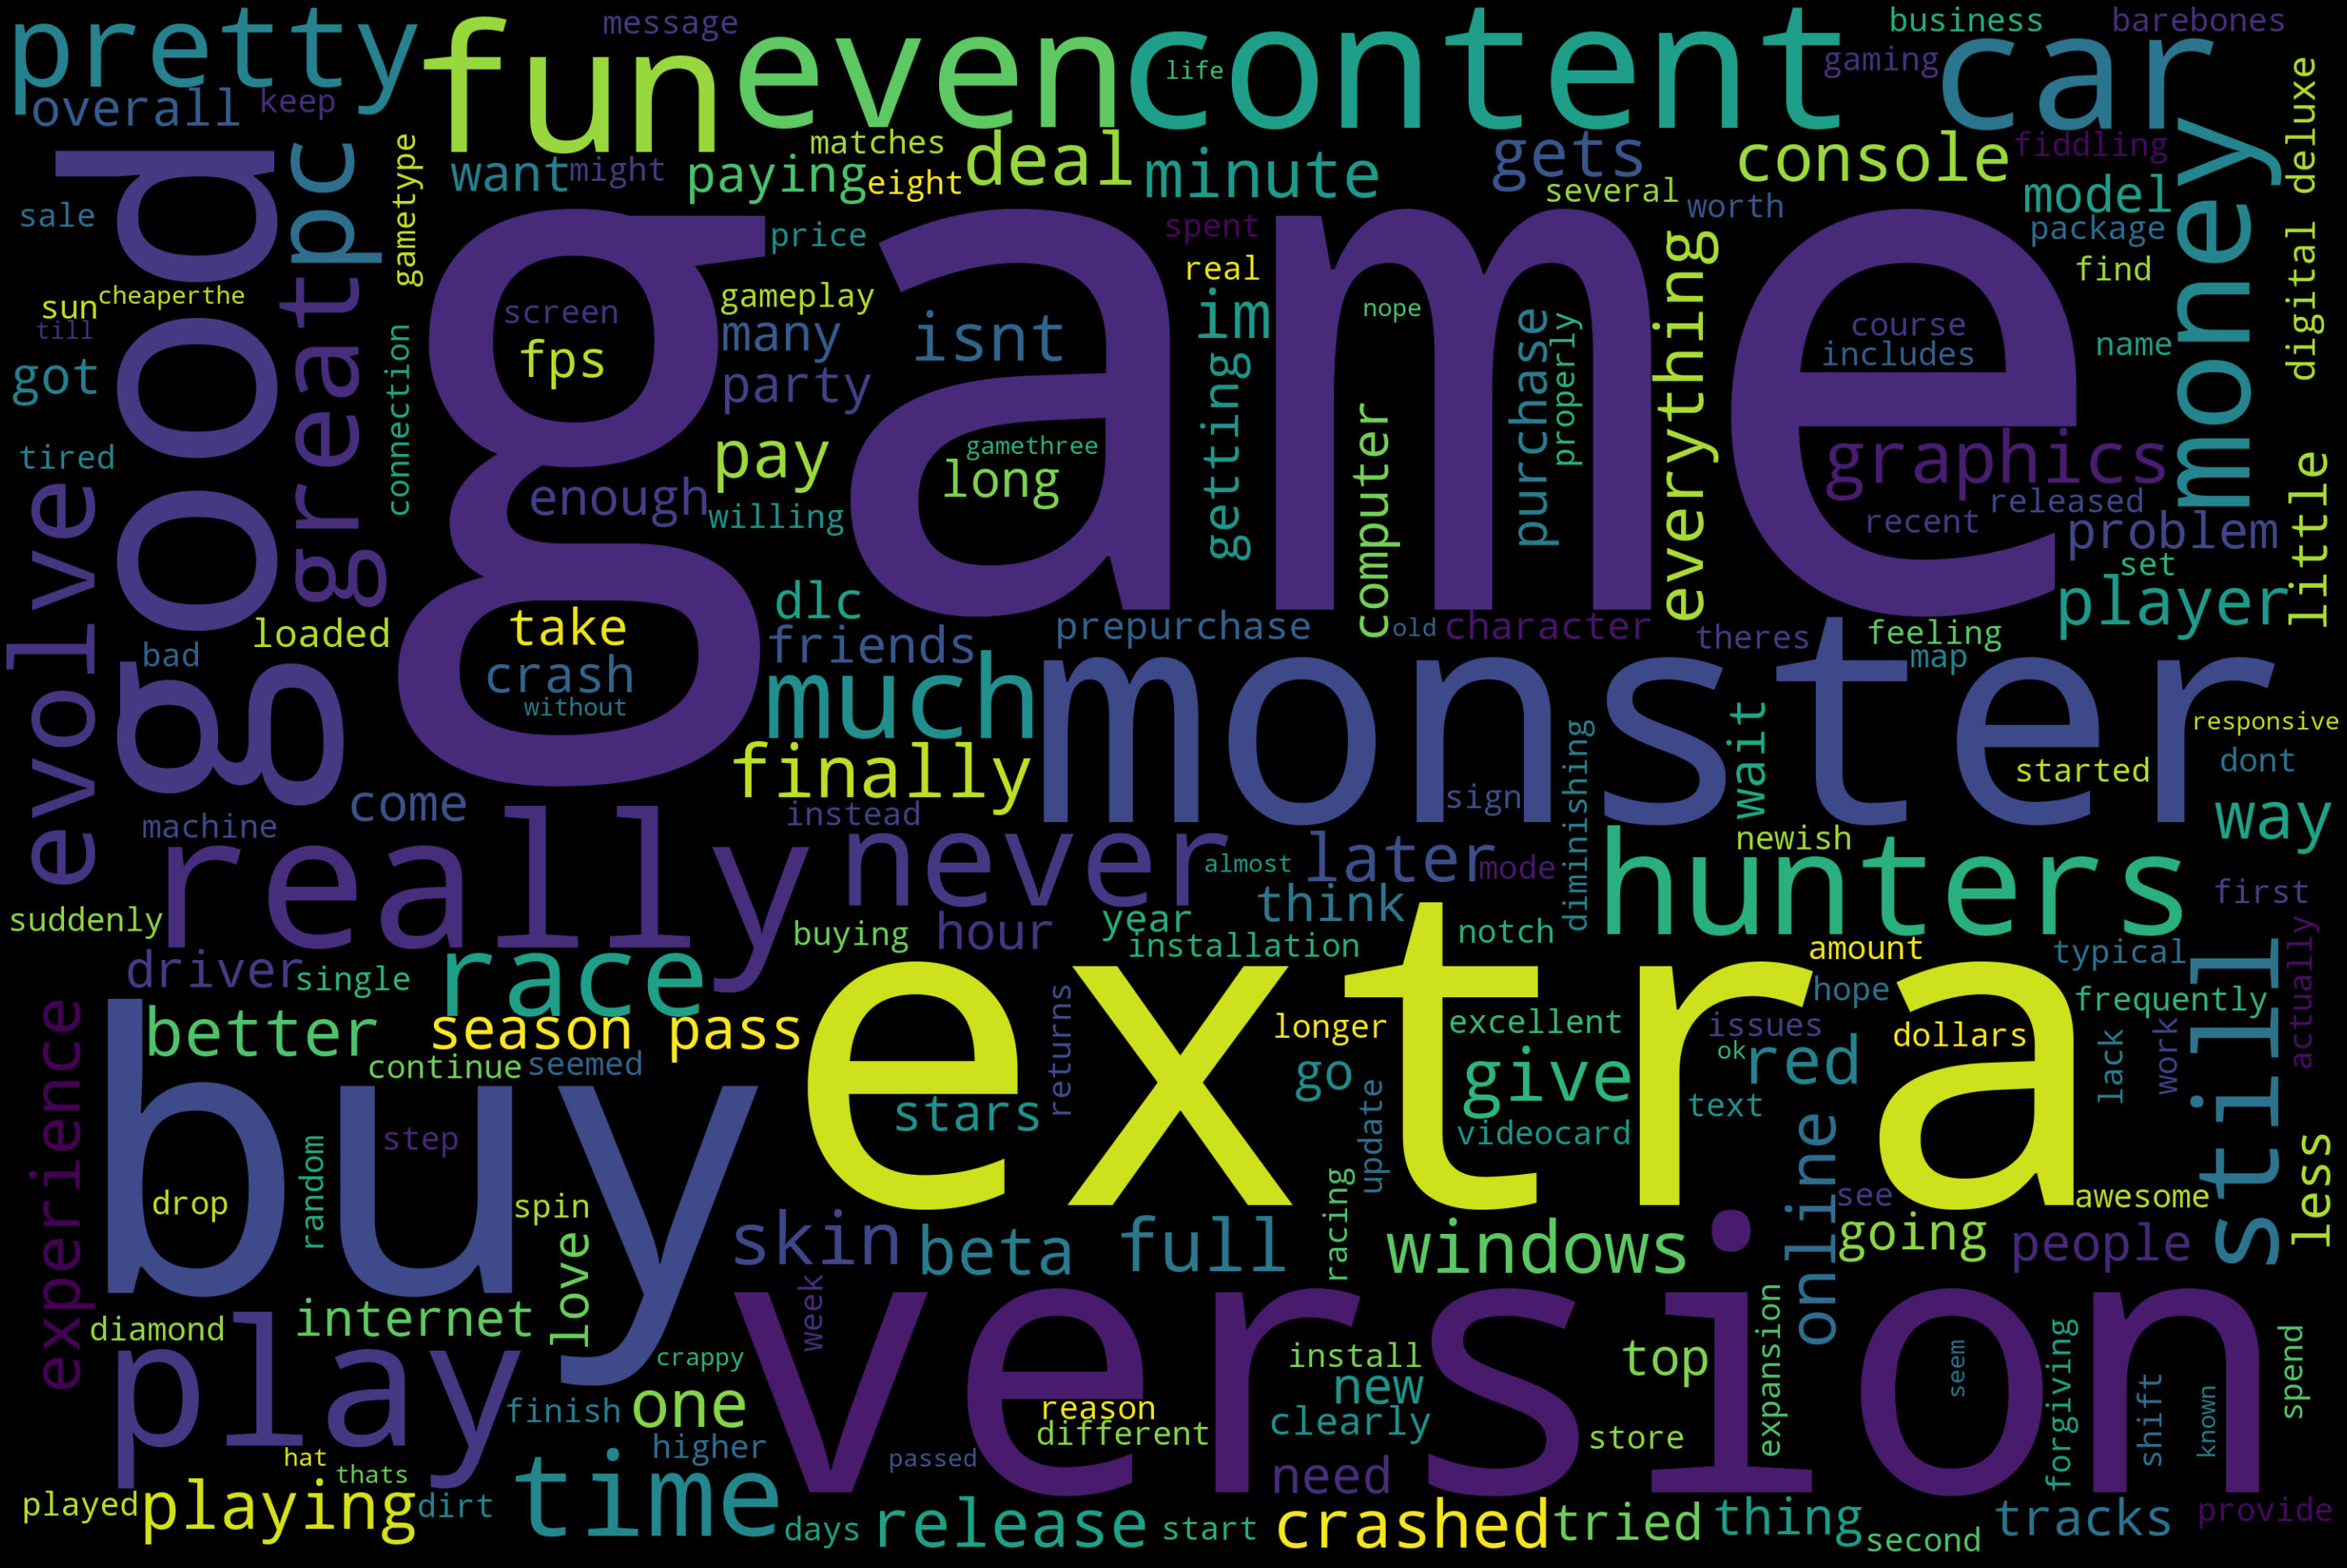

In [22]:
text = review_neu["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

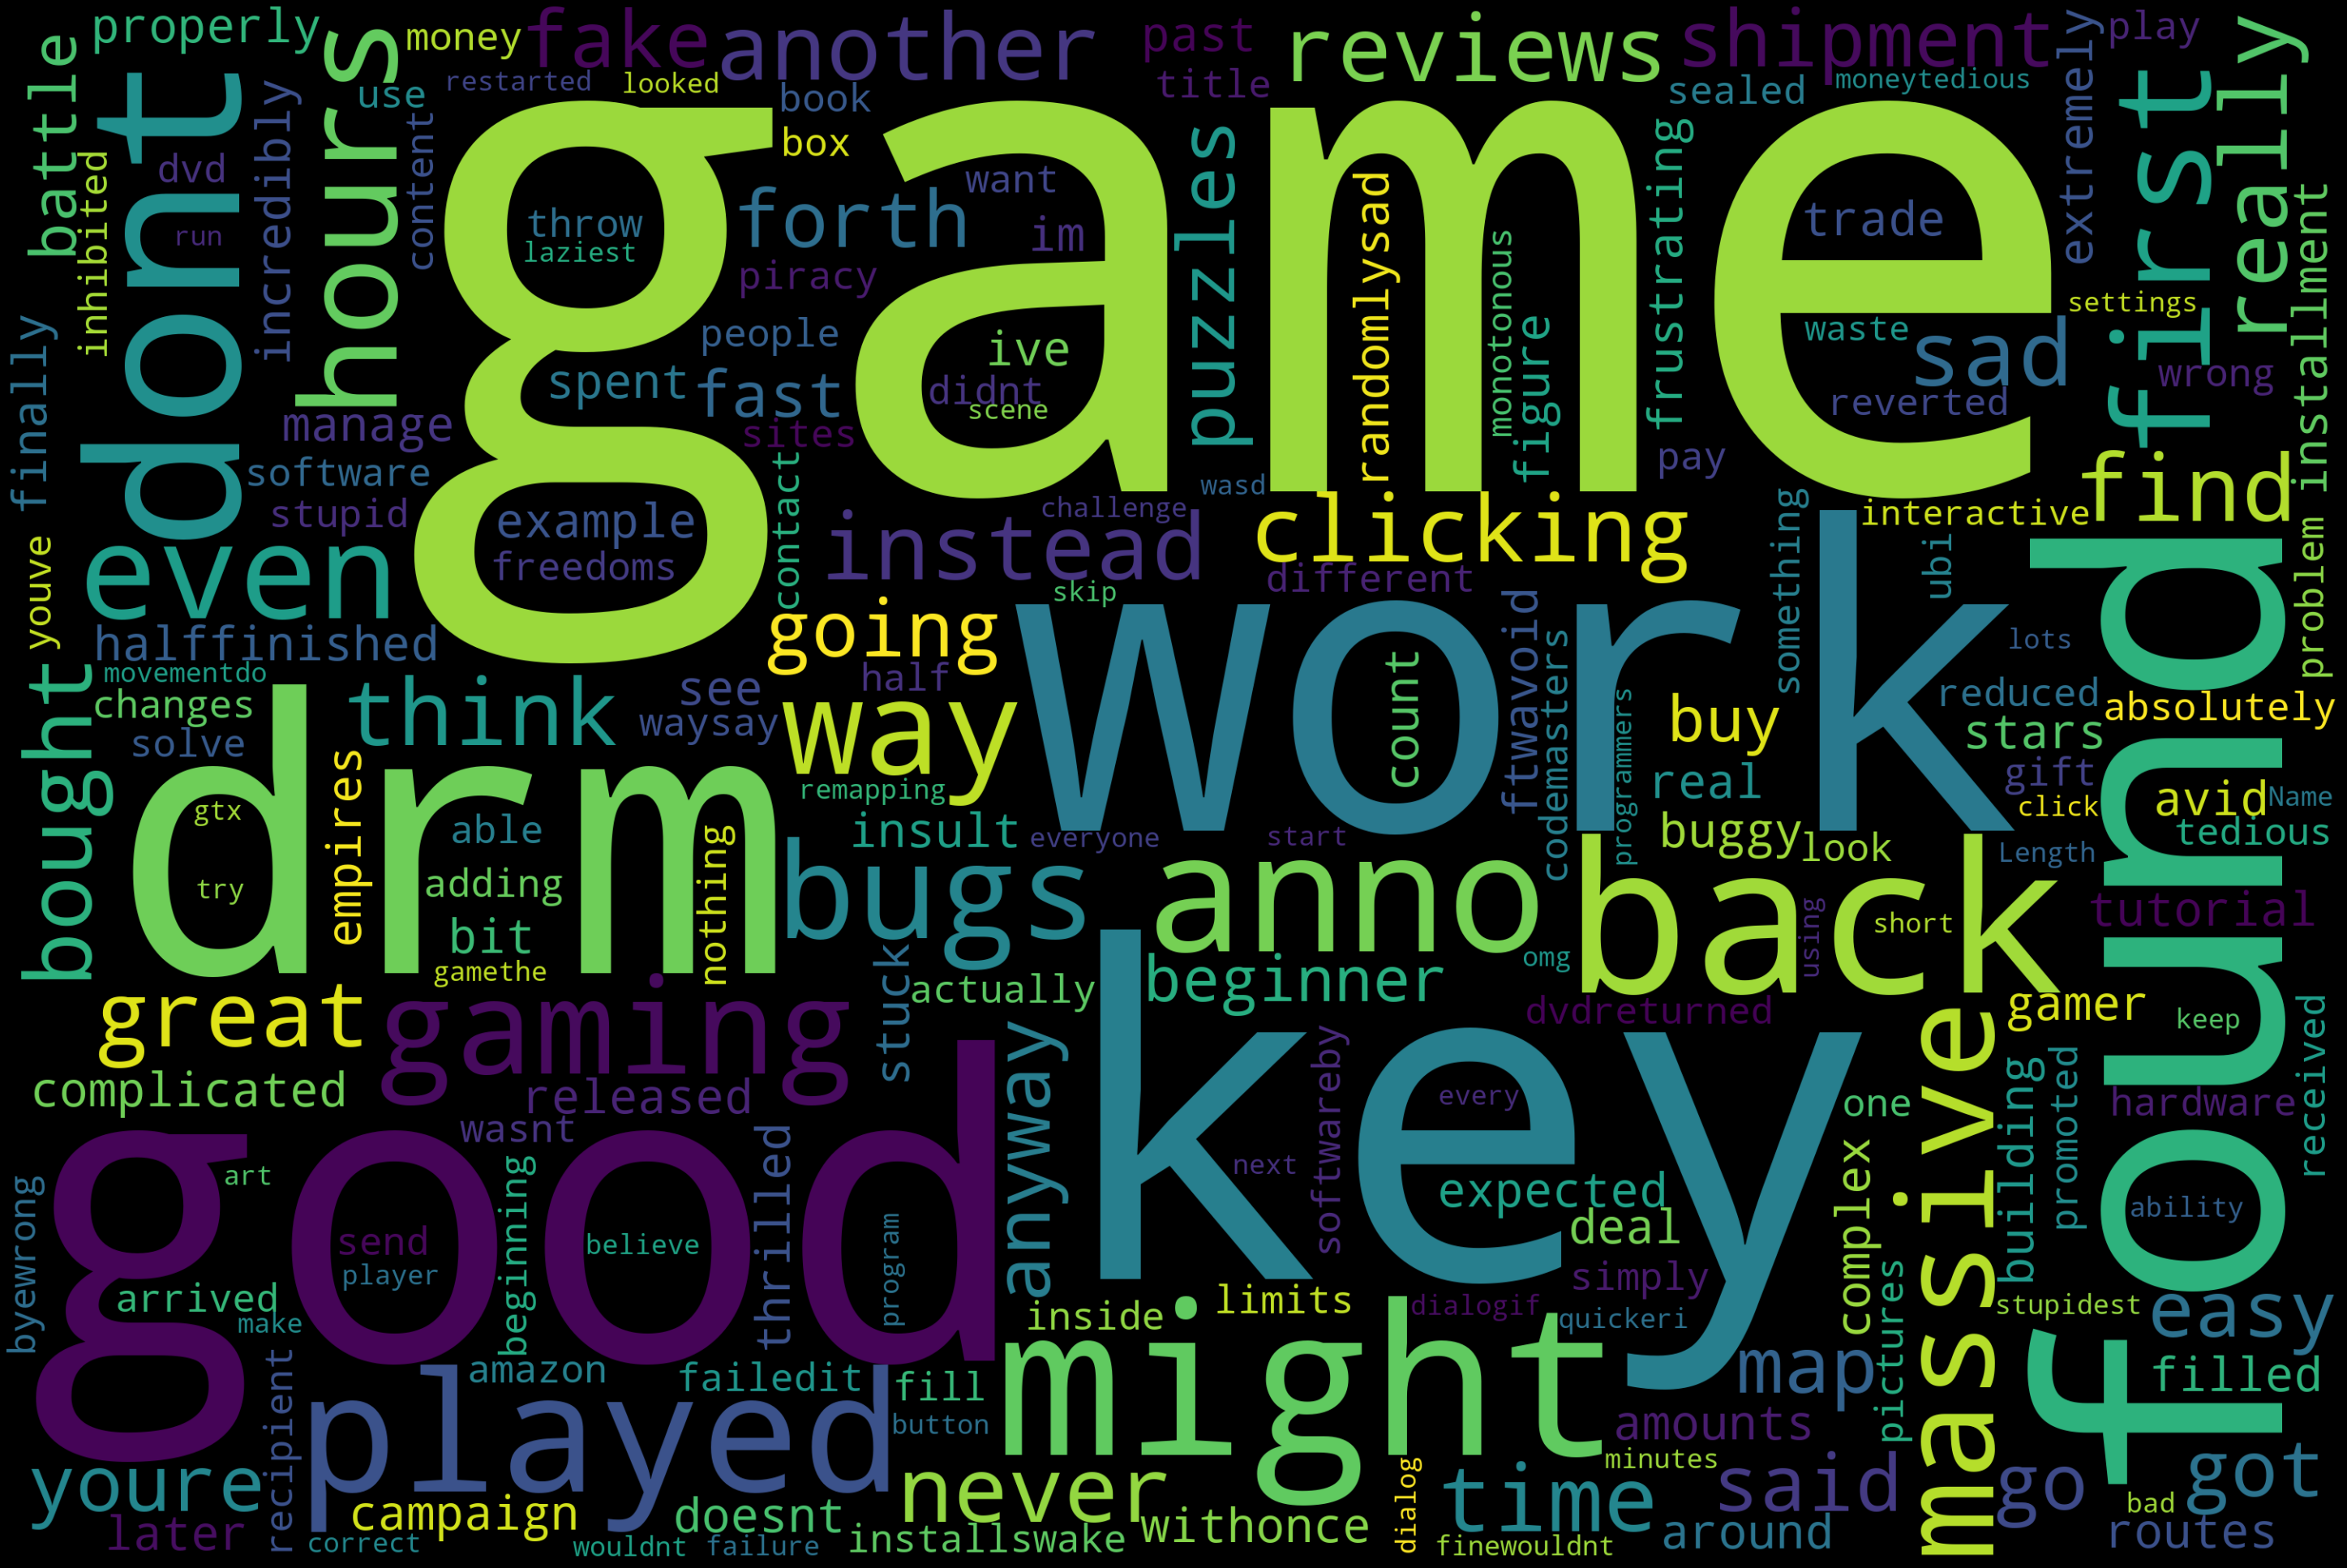

In [23]:
text = review_neg["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [24]:
reviews["review_word_count"] = reviews["reviews"].apply(lambda reviews: len(reviews.split()))
reviews.head()

asin  overall      title  \
0  0700026657        5  Anno 2070   
1  0700026657        4  Anno 2070   
2  0700026657        3  Anno 2070   
3  0700026657        2  Anno 2070   
4  0700026657        5  Anno 2070   

                                                                                    imageURL  \
0  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
1  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
2  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
3  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   
4  https://images-na.ssl-images-amazon.com/images/I/51naywTctIL._SX38_SY50_CR,0,0,38,50_.jpg   

                                                                                                                                                                reviews  \
0                                                                                                                                 game bit hard get hang greatbut great   
1  played alright steam bit trouble move game steam hard time activating playing game spite fun liked looking forward anno really want play way moonbut spite fun liked   
2                                                                                                                                                    ok gamethree stars   
3                                                                                                                      found game bit complicated expected played stars   
4                                                                                                                         great game love played since arrivedlove game   

  sentiment   year month day  review_word_count  
0  Positive   2015    10  17                  7  
1  Positive   2015    07  27                 27  
2   Neutral   2015    02  23                  3  
3  Negative   2015    02  20                  7  
4  Positive   2014    12  25                  7

In [26]:
reviews['polarity'] = reviews['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)

KeyError: 'Review Text'